In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Importando dados

In [2]:
def cria_e_arruma_df(fonte):
    df = pd.read_csv(fonte)
    print('O tamanho do arquivo é:',len(df))
    df = df.set_index('ID')
    return df

In [3]:
s_subm = cria_e_arruma_df('https://raw.githubusercontent.com/Zorug/Projetos_Futuros/master/Projetos-3-4/Projeto03-santander-customer-satisfaction/dataset-santander-customer-satisfaction/sample_submission.csv')#; s_subm.head(2)
print('----')
dados_test = cria_e_arruma_df('https://raw.githubusercontent.com/Zorug/Projetos_Futuros/master/Projetos-3-4/Projeto03-santander-customer-satisfaction/dataset-santander-customer-satisfaction/test.csv')#; dados_test.head(2)
print('----')
dados_train = cria_e_arruma_df('https://raw.githubusercontent.com/Zorug/Projetos_Futuros/master/Projetos-3-4/Projeto03-santander-customer-satisfaction/dataset-santander-customer-satisfaction/train.csv')
dados_train.head(2)

O tamanho do arquivo é: 75818
----
O tamanho do arquivo é: 75818
----
O tamanho do arquivo é: 76020


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0


# Limpeza de dados

## Mudança de tipos

In [4]:
def turn_to_float(dados): # Torna todos os dados float
    print('antes do tratamento:', dados.dtypes.value_counts()[1])
    for i in range(len(dados.columns)):
        dados[dados.columns[i]] = dados[dados.columns[i]].astype('float64')
    print('depois do tratamento:', dados.dtypes.value_counts()[0])
    return dados

In [5]:
dtrain_flt = turn_to_float(dados_train)
print('----')
dtest_flt = turn_to_float(dados_test)
dtest_flt.head(3)

antes do tratamento: 111
depois do tratamento: 370
----
antes do tratamento: 110
depois do tratamento: 369


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
2,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
5,2.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
6,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95


## Verificando missing

In [6]:
na_number = dtrain_flt.isna().sum()
na_number.value_counts() #Não há valores missing em TRAIN

0    370
dtype: int64

In [7]:
na_number = dtest_flt.isna().sum()
na_number.value_counts() #Não há valores missing em TESTE

0    369
dtype: int64

## Separação do treino em X e Y

In [8]:
dtrain_flt_X = dtrain_flt.drop("TARGET", 1) # Matriz de características
dtrain_flt_Y = dtrain_flt["TARGET"] # Variável alvo

## Feature Selection

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Feature extraction
model = LogisticRegression()
n_features_to_select = 100
rfe = RFE(model, n_features_to_select = n_features_to_select)
fit = rfe.fit(dtrain_flt_X, dtrain_flt_Y)
print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 100


In [12]:
x_train_featured = dtrain_flt_X[dtrain_flt_X.columns[fit.support_]]
x_test_featured = dtest_flt[dtest_flt.columns[fit.support_]].head(); x_test_featured

,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,...,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var33_hace2,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
2,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
5,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
6,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
7,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
9,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


# ML - Xgboost

In [13]:
!pip install xgboost
!pip install --upgrade xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Requirement already up-to-date: xgboost in c:\users\cassi\anaconda3\lib\site-packages (1.0.2)


In [14]:
def xgboost_accuracy(dtrain_flt_X, dtrain_flt_Y, test_size):
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(dtrain_flt_X, dtrain_flt_Y, test_size=test_size)
    
    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)
    
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print(f"Para test_size = {test_size} -> Accuracy: {round(accuracy * 100.0, 2)}%")

In [15]:
test_size = 0.25
xgboost_accuracy(dtrain_flt_X, dtrain_flt_Y, test_size)

Para test_size = 0.25 -> Accuracy: 96.1%


In [16]:
# agora com as features trabalhadas
test_size = 0.25
xgboost_accuracy(x_train_featured, dtrain_flt_Y, test_size)

Para test_size = 0.25 -> Accuracy: 95.83%


## ML Random Forrest


In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
"""
regr = RandomForestRegressor(n_estimators=100)
regr.fit(dtrain_flt_X, dtrain_flt_Y)
print(regr.score(dtrain_flt_X, dtrain_flt_Y))
"""

'\nregr = RandomForestRegressor(n_estimators=100)\nregr.fit(dtrain_flt_X, dtrain_flt_Y)\nprint(regr.score(dtrain_flt_X, dtrain_flt_Y))\n'

In [19]:
def randomforest_accuracy(dtrain_flt_X, dtrain_flt_Y, n_estimators):
  regr = RandomForestRegressor(n_estimators=n_estimators)
  regr.fit(dtrain_flt_X, dtrain_flt_Y)
  print(round(regr.score(dtrain_flt_X, dtrain_flt_Y), 5))

In [20]:
n_estimators = 100
randomforest_accuracy(dtrain_flt_X, dtrain_flt_Y, n_estimators)
randomforest_accuracy(dtrain_flt_X, dtrain_flt_Y, 200)

0.78531
0.78893


In [21]:
n_estimators = 100
randomforest_accuracy(x_train_featured, dtrain_flt_Y, n_estimators)
randomforest_accuracy(x_train_featured, dtrain_flt_Y, 200)

0.7853
0.78783


# ML - Adaboost: Best for this model

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
def adaboost_accuracy(dtrain_flt_X, dtrain_flt_Y, n_estimators):
    ada = AdaBoostClassifier(n_estimators=n_estimators)
    ada.fit(dtrain_flt_X, dtrain_flt_Y)
    print(f'para {n_estimators} estimators ->', round(ada.score(dtrain_flt_X, dtrain_flt_Y), 5))

In [24]:
n_estimators=100
adaboost_accuracy(dtrain_flt_X, dtrain_flt_Y, n_estimators)
adaboost_accuracy(dtrain_flt_X, dtrain_flt_Y, 200)

para 100 estimators -> 0.96029
para 200 estimators -> 0.96046


In [25]:
# agora com as features trabalhadas
n_estimators=100
adaboost_accuracy(x_train_featured, dtrain_flt_Y, n_estimators)
adaboost_accuracy(x_train_featured, dtrain_flt_Y, 200)

para 100 estimators -> 0.96037
para 200 estimators -> 0.96043


In [26]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(dtrain_flt_X, dtrain_flt_Y)

ada.score(dtrain_flt_X, dtrain_flt_Y) # acerto do modelo

0.9602867666403578

In [27]:
# Ordena as features mais relevantes
colunas = dtrain_flt_X.columns#; colunas
pesos_das_features = ada.feature_importances_#; pesos_das_features
heaviest_weights = pd.Series(pesos_das_features, index=colunas).sort_values(ascending=False); heaviest_weights

var15                     0.13
saldo_medio_var5_hace3    0.08
saldo_var30               0.07
var38                     0.06
saldo_medio_var5_ult1     0.05
                          ... 
imp_aport_var17_hace3     0.00
imp_aport_var17_ult1      0.00
imp_aport_var33_hace3     0.00
imp_aport_var33_ult1      0.00
saldo_var32               0.00
Length: 369, dtype: float64

In [28]:
ada.predict(dtest_flt) # previsão do modelo

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
# probabilidade de insatisfação
#prob_insatisfacao = ada.predict_proba(dtest_flt)
new_test = dtest_flt.copy()
new_test['Prob_Ins'] = prob_insatisfacao = ada.predict_proba(new_test)[:,1]; new_test['Prob_Ins']

ID
2         0.494127
5         0.494246
6         0.484255
7         0.489358
9         0.485112
            ...   
151831    0.490561
151832    0.489501
151833    0.483460
151834    0.492873
151837    0.483055
Name: Prob_Ins, Length: 75818, dtype: float64

Text(0, 0.5, 'Frequência')

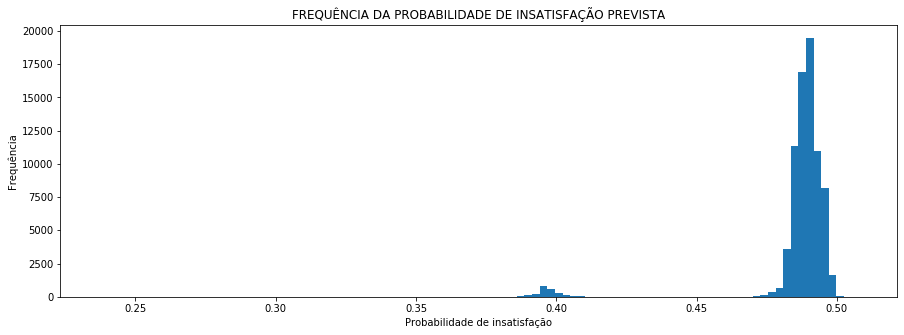

In [31]:
ax = new_test['Prob_Ins'].plot(kind='hist', bins=100, figsize=(15, 5), 
                                title='FREQUÊNCIA DA PROBABILIDADE DE INSATISFAÇÃO PREVISTA')
ax.set_xlabel("Probabilidade de insatisfação")
ax.set_ylabel("Frequência")